In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Kütüphaneler hazır")

Kütüphaneler hazır


In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"

df = pd.read_csv(url)
df.to_csv("parkinson.csv", index=False)

print(df.shape)
print(df.head())
print(df['status'].value_counts())

(195, 24)
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0  

In [3]:
print(df.isnull().sum())
print(df.describe())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940 

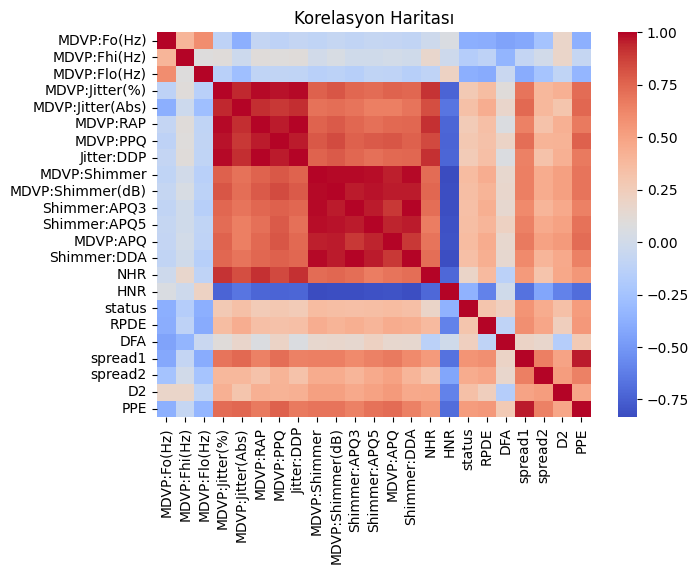

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.heatmap(df.drop(columns=['name']).corr(),cmap='coolwarm', annot=False)
plt.title("Korelasyon Haritası")
plt.show()

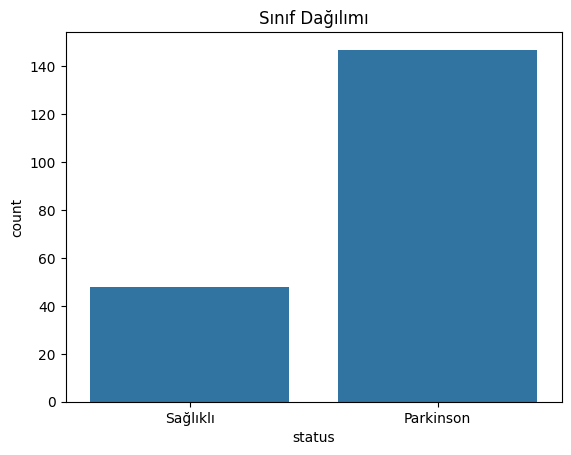

In [5]:
sns.countplot(x='status', data=df)
plt.title("Sınıf Dağılımı")
plt.xticks([0, 1], ['Sağlıklı','Parkinson'])
plt.show()

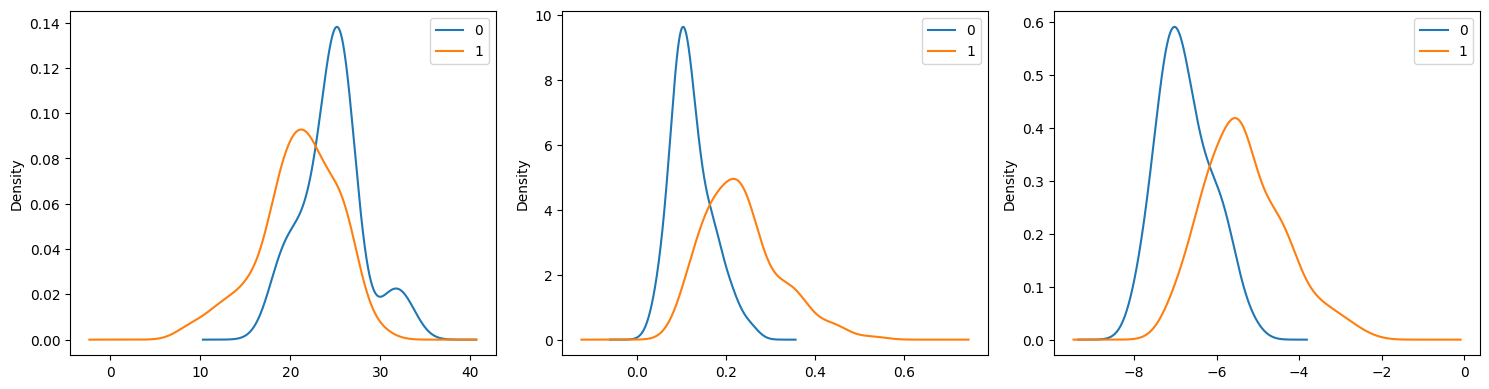

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

for ax, col in zip(axes, ['HNR', 'PPE', 'spread1']):
    df.groupby('status')[col].plot(kind='kde', ax=ax, legend=True)
    
plt.tight_layout()
plt.show()

In [7]:
X = df.drop(columns=['name', 'status'])
Y = df['status']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42, stratify=Y
)

print(X_train.shape, X_test.shape)


(156, 22) (39, 22)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(Y_test, Y_pred), 3))
print("F1 Score:", round(f1_score(Y_test, Y_pred), 3))

Accuracy: 0.769
F1 Score: 0.824


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, Y_train)

Y_pred_rf   = rf_model.predict(X_test)

print("Accuracy", round(accuracy_score(Y_test, Y_pred_rf), 3))
print("F1 Score", round(f1_score(Y_test, Y_pred_rf), 3))

Accuracy 0.923
F1 Score 0.949


In [11]:
from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(rf_model, X_scaled, Y, cv=5, scoring='accuracy')
cv_f1 = cross_val_score(rf_model, X_scaled, Y, cv=5, scoring='f1')

print("CV Accuracy:", cv_accuracy.round(3))
print("Ortalama:", cv_accuracy.mean().round(3))
print("CV F1:", cv_f1.round(3))
print("Ortalama:", cv_f1.mean().round(3))

CV Accuracy: [0.744 0.821 0.897 0.744 0.744]
Ortalama: 0.79
CV F1: [0.839 0.892 0.929 0.844 0.853]
Ortalama: 0.871


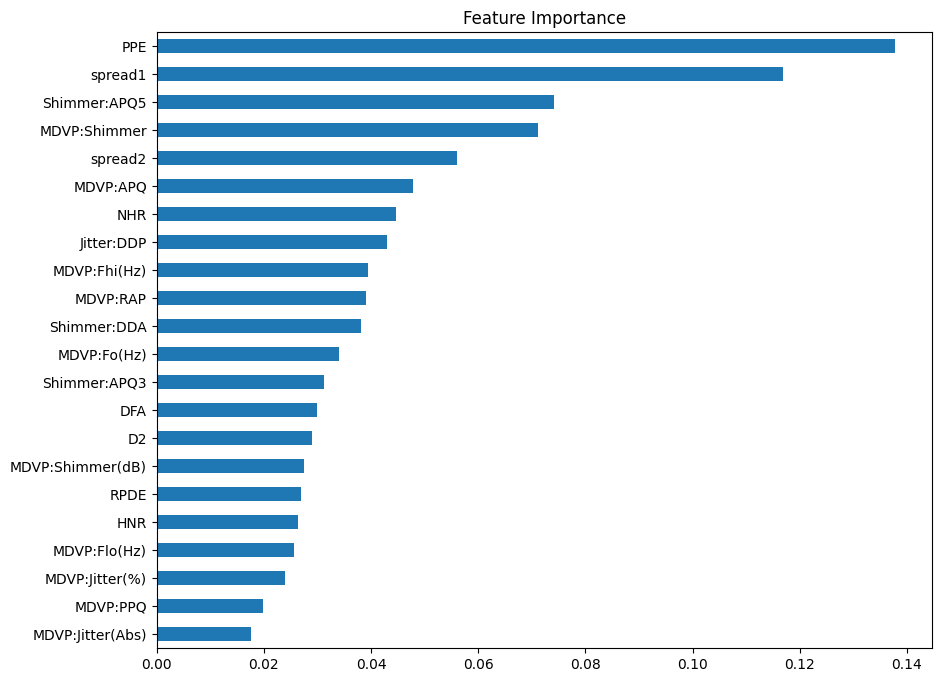

In [12]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title("Feature Importance")
plt.show()

In [13]:
import librosa
import numpy as np

y, sr = librosa.load(librosa.ex('trumpet'))

print("Örnekleme Hızı(sr):", sr)
print("Ses Dizisi Uzunluğu:", len(y))

c:\Users\pc\Desktop\Parkinson-projesi\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Örnekleme Hızı(sr): 22050
Ses Dizisi Uzunluğu: 117601


In [14]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

print("MFCC Boyutu:", mfcc.shape)

MFCC Boyutu: (13, 230)


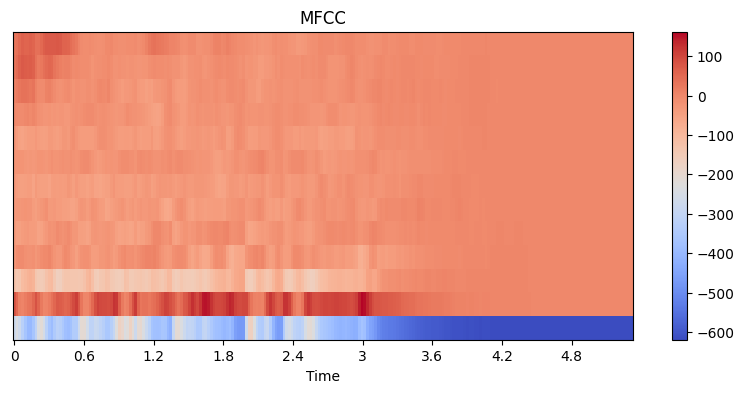

In [15]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title("MFCC")
plt.show()

In [16]:
mfcc_mean = np.mean(mfcc, axis=1)

print("MFCC Ortalama Boyutu:", mfcc_mean.shape)
print("Değerler:", mfcc_mean.round(2))

MFCC Ortalama Boyutu: (13,)
Değerler: [-4.4226e+02  5.0380e+01 -7.0580e+01 -1.8440e+01 -1.6290e+01 -1.8830e+01
 -2.1320e+01 -1.3630e+01 -2.0640e+01 -1.2660e+01 -9.4600e+00 -4.9700e+00
  4.0000e-01]


In [17]:
zcr = librosa.feature.zero_crossing_rate(y)
zcr_mean = np.mean(zcr)

mel = librosa.feature.melspectrogram(y=y, sr=sr)
mel_mean = np.mean(mel, axis=1)

print("ZCR:", zcr_mean.round(4))
print("Mel:", mel_mean.shape)

ZCR: 0.1735
Mel: (128,)


In [18]:
features = np.concatenate([mfcc_mean, [zcr_mean], mel_mean])

print("Toplam Özellik Sayısı:", features.shape)

Toplam Özellik Sayısı: (142,)


In [19]:
import os
import librosa
import numpy as np
import pandas as pd

base_path = os.path.join("ses-data", "extracted", "data", "Archive Raw Audio")
parkinson_path = os.path.join(base_path, "Parkinson a")
healthy_path = os.path.join(base_path, "Healthy a")

def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, duration=3)
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
        zcr = np.mean(librosa.feature.zero_crossing_rate(y))
        mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr), axis=1)
        return np.concatenate([mfcc, [zcr], mel])
    except:
        return None

print("Fonksiyon hazır")

Fonksiyon hazır


In [20]:
data = []

for file in os.listdir(parkinson_path):
    if file.endswith(".wav"):
        path = os.path.join(parkinson_path, file)
        features = extract_features(path)
        if features is not None:
            data.append([*features, 1])

for file in os.listdir(healthy_path):
    if file.endswith(".wav"):
        path = os.path.join(healthy_path, file)
        features = extract_features(path)
        if features is not None:
            data.append([*features, 0])

df_ses = pd.DataFrame(data)
df_ses.columns = [f"f{i}" for i in range(142)] + ["status"]

print(df_ses.shape)
print(df_ses["status"].value_counts())

c:\Users\pc\Desktop\Parkinson-projesi\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=146
  warnings.warn(
c:\Users\pc\Desktop\Parkinson-projesi\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=153
  warnings.warn(
c:\Users\pc\Desktop\Parkinson-projesi\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=112
  warnings.warn(
c:\Users\pc\Desktop\Parkinson-projesi\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=121
  warnings.warn(
c:\Users\pc\Desktop\Parkinson-projesi\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=120
  warnings.warn(
c:\Users\pc\Desktop\Parkinson-projesi\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is to

(540, 143)
status
1    276
0    264
Name: count, dtype: int64


In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

X = df_ses.drop(columns=["status"])
Y = df_ses["status"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

xgb = XGBClassifier(random_state=42, eval_metric="logloss")
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)

print("Accuracy:", round(accuracy_score(Y_test, Y_pred), 3))
print("F1 Score:", round(f1_score(Y_test, Y_pred), 3))

Accuracy: 0.824
F1 Score: 0.835


In [22]:
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(xgb, X_scaled, Y, cv=5, scoring="accuracy")
cv_f1  = cross_val_score(xgb, X_scaled, Y, cv=5, scoring="f1")

print("XGBoost CV Accuracy:", cv_acc.mean().round(3))
print("XGBoost CV F1:", cv_f1.mean().round(3))

XGBoost CV Accuracy: 0.591
XGBoost CV F1: 0.6


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_cv_acc = cross_val_score(rf, X_scaled, Y, cv=5, scoring="accuracy")
rf_cv_f1  = cross_val_score(rf, X_scaled, Y, cv=5, scoring="f1")

print("Random Forest CV Accuracy:", rf_cv_acc.mean().round(3))
print("Random Forest CV F1:", rf_cv_f1.mean().round(3))


Random Forest CV Accuracy: 0.589
Random Forest CV F1: 0.6


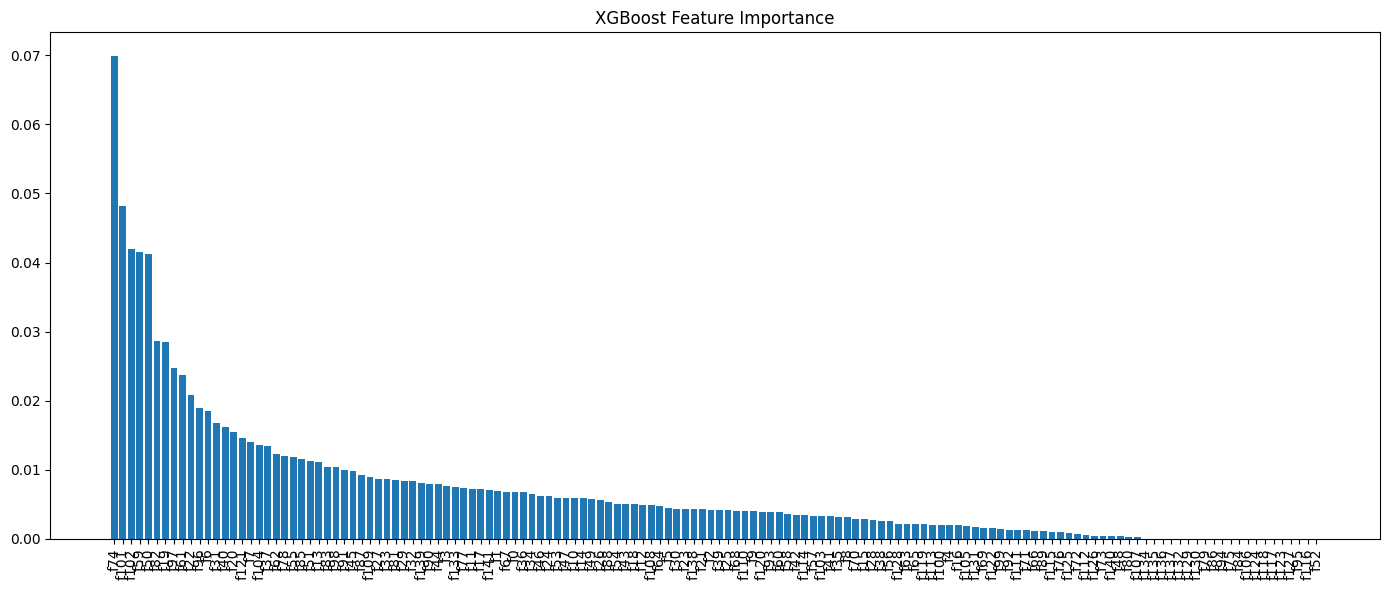

In [24]:
import numpy as np
import matplotlib.pyplot as plt

features_names = X.columns
importances = xgb.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features_names[indices], rotation=90)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

In [25]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Parkinson
pd_noisy = r"ses-data\extracted\data\Archive Raw Audio\Parkinson a\PD3i1.wav"
pd_clean = r"ses-data\extracted\data\Archive Raw Audio\Parkinson a\PD3i1_clean.wav"

# Healthy
hc_noisy = r"ses-data\extracted\data\Archive Raw Audio\Healthy a\HC4a2.wav"
hc_clean = r"ses-data\extracted\data\Archive Raw Audio\Healthy a\HC4a2_clean.wav"

def bandpass_filter(y, sr, low=80, high=8000, order=1):
    nyq = 0.5 * sr
    b, a = butter(order, [low/nyq , high/nyq], btype='band')
    return lfilter(b, a, y)

In [26]:
def plot_mel(y, sr, title):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)
    
    plt.figure(figsize=(4, 3))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

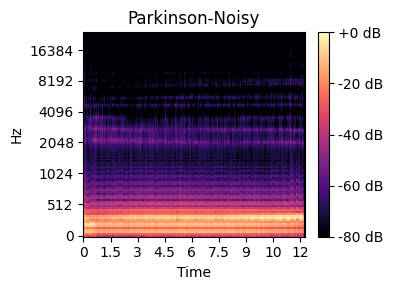

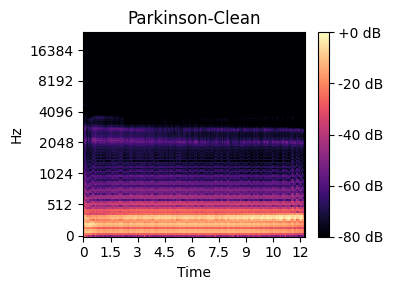

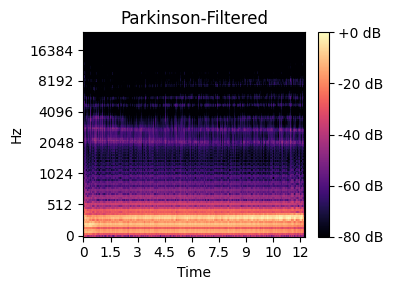

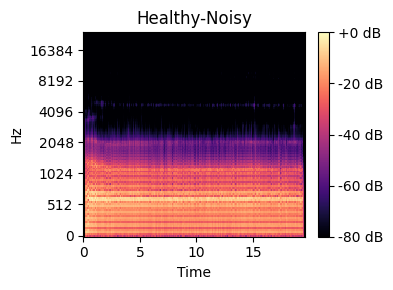

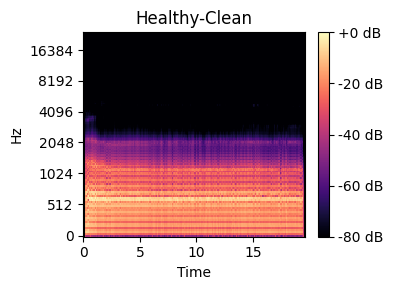

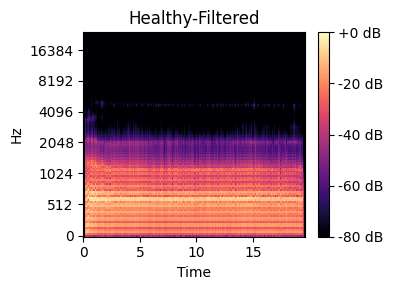

In [27]:
y_pd_noisy, sr = librosa.load(pd_noisy, sr=None)
y_pd_clean, _ = librosa.load(pd_clean, sr=None)
y_pd_filtered = bandpass_filter(y_pd_noisy, sr)

plot_mel(y_pd_noisy, sr, "Parkinson-Noisy")
plot_mel(y_pd_clean, sr, "Parkinson-Clean")
plot_mel(y_pd_filtered, sr, "Parkinson-Filtered")

y_hc_noisy, sr = librosa.load(hc_noisy, sr=None)
y_hc_clean, _ = librosa.load(hc_clean, sr=None)
y_hc_filtered = bandpass_filter(y_hc_noisy, sr)

plot_mel(y_hc_noisy, sr, "Healthy-Noisy")
plot_mel(y_hc_clean, sr, "Healthy-Clean")
plot_mel(y_hc_filtered, sr, "Healthy-Filtered")

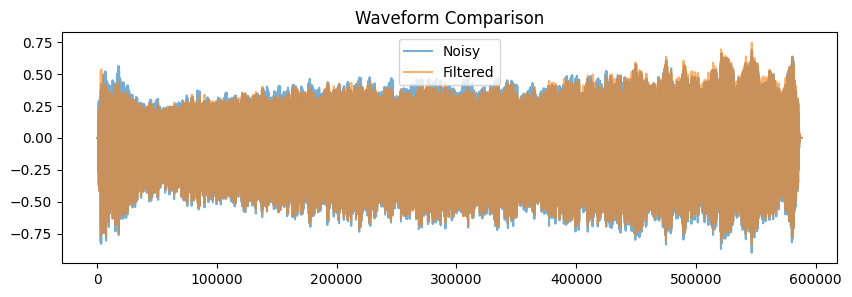

Noisy energy: 0.06986555
Filtered energy: 0.06289136925277757


In [28]:
plt.figure(figsize=(10,3))
plt.plot(y_pd_noisy, alpha=0.6, label="Noisy")
plt.plot(y_pd_filtered, alpha=0.6, label="Filtered")
plt.legend()
plt.title("Waveform Comparison")
plt.show()

print("Noisy energy:", np.mean(y_pd_noisy**2))
print("Filtered energy:", np.mean(y_pd_filtered**2))

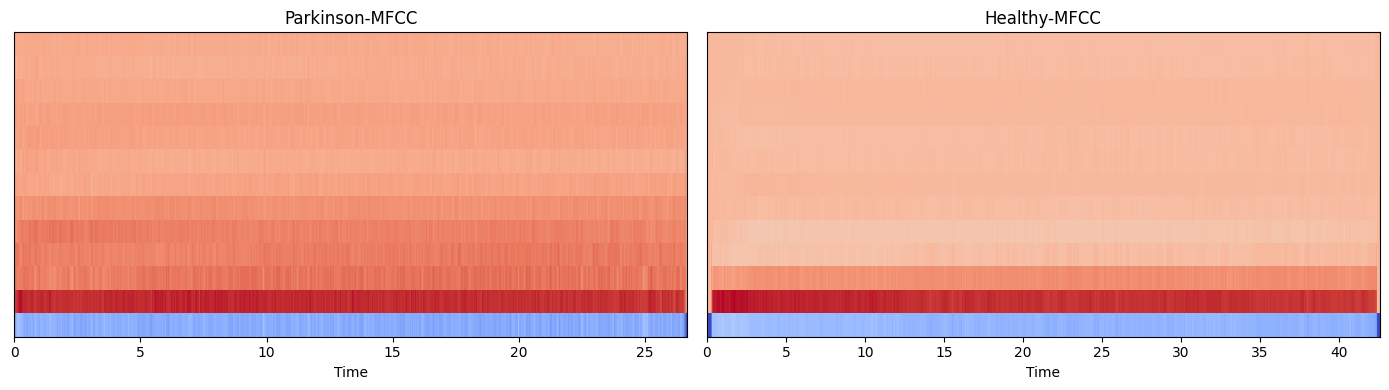

In [29]:
y_pd, sr = librosa.load(r"ses-data\extracted\data\Archive Raw Audio\Parkinson a\PD3i1.wav", sr=None, dtype=float)
y_hc, sr = librosa.load(r"ses-data\extracted\data\Archive Raw Audio\Healthy a\HC4a2.wav", sr=None, dtype=float)

mfcc_pd = librosa.feature.mfcc(y=y_pd.astype(float), sr=sr, n_mfcc=13)
mfcc_hc = librosa.feature.mfcc(y=y_hc.astype(float), sr=sr, n_mfcc=13)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

librosa.display.specshow(mfcc_pd, x_axis='time', ax=axes[0])
axes[0].set_title("Parkinson-MFCC")

librosa.display.specshow(mfcc_hc, x_axis='time', ax=axes[1])
axes[1].set_title("Healthy-MFCC")

plt.tight_layout()
plt.show()

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Veriyi tensöre çevirme
X_tensor = torch.FloatTensor(X_scaled)
Y_tensor = torch.FloatTensor(Y.values)

# Train/test böl
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_tensor, Y_tensor, test_size=0.2, random_state=42)

train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

print("Train Boyutu:", X_train.shape)
print("Test Boyutu:", X_test.shape)


Train Boyutu: torch.Size([432, 142])
Test Boyutu: torch.Size([108, 142])


In [31]:
class CNN1D(nn.Module):
    def __init__(self):
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(2)
        self.fc1 = nn.Linear(64 * 35, 128)
        self.fc2 = nn.Linear(128, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, X):
        X = X.unsqueeze(1)
        X = self.relu(self.conv1(X))
        X = self.pool(X)
        X = self.relu(self.conv2(X))
        X = self.pool(X)
        X = X.view(X.size(0), -1)
        X = self.dropout(self.relu(self.fc1(X)))
        return self.fc2(X)

model = CNN1D()
print(model)

CNN1D(
  (conv1): Conv1d(1, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2240, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
)


In [32]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 30
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch).squeeze()
        loss = criterion(output, Y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss/len(train_loader):.4f}")
torch.save(model.state_dict(), "cnn.pth")

Epoch 5/30 - Loss: 0.5117
Epoch 10/30 - Loss: 0.3810
Epoch 15/30 - Loss: 0.2734
Epoch 20/30 - Loss: 0.2419
Epoch 25/30 - Loss: 0.2213
Epoch 30/30 - Loss: 0.1940


In [33]:
model.eval()
with torch.no_grad():
    output = model(X_test).squeeze()
    preds = (torch.sigmoid(output) > 0.5).float()
    
print("CNN Accuracy:", round(accuracy_score(Y_test.numpy(), preds.numpy()), 3))
print("CNN F1 Score:", round(f1_score(Y_test.numpy(), preds.numpy()), 3))

CNN Accuracy: 0.88
CNN F1 Score: 0.885


In [34]:
import pandas as pd

results = {
    "Model": ["1D CNN", "Random Forest", "XGBoost"],
    "Accuracy": [0.861, 0.589, 0.591],
    "F1 Score": [0.867, 0.600, 0.600]
}

df_results = pd.DataFrame(results)
print(df_results)


           Model  Accuracy  F1 Score
0         1D CNN     0.861     0.867
1  Random Forest     0.589     0.600
2        XGBoost     0.591     0.600


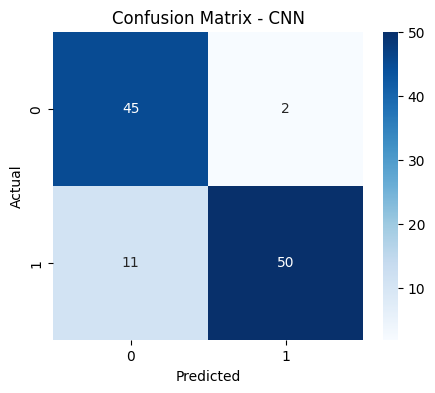

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87        47
         1.0       0.96      0.82      0.88        61

    accuracy                           0.88       108
   macro avg       0.88      0.89      0.88       108
weighted avg       0.89      0.88      0.88       108



In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix - CNN
cm = confusion_matrix(Y_test.numpy(), preds.numpy())
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN")
plt.show()

print("Classification Report:")
print(classification_report(Y_test.numpy(), preds.numpy()))

In [36]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

base_path = os.path.join("ses-data", "extracted", "data", "Archive Raw Audio")
parkinson_path = os.path.join(base_path, "Parkinson a")
healthy_path = os.path.join(base_path, "Healthy a")

def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None, duration=3)
        y = y.astype(float)
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
        zcr = np.mean(librosa.feature.zero_crossing_rate(y))
        mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr), axis=1)
        return np.concatenate([mfcc, [zcr], mel])
    except:
        return None

data = []
for file in os.listdir(parkinson_path):
    if file.endswith(".wav"):
        f = extract_features(os.path.join(parkinson_path, file))
        if f is not None:
            data.append([*f, 1])
for file in os.listdir(healthy_path):
    if file.endswith(".wav"):
        f = extract_features(os.path.join(healthy_path, file))
        if f is not None:
            data.append([*f, 0])

df_ses = pd.DataFrame(data)
df_ses.columns = [f"f{i}" for i in range(142)] + ["status"]

X = df_ses.drop(columns=["status"])
scaler = StandardScaler()
scaler.fit(X)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Scaler kaydedildi")

c:\Users\pc\Desktop\Parkinson-projesi\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=317
  warnings.warn(
c:\Users\pc\Desktop\Parkinson-projesi\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=333
  warnings.warn(
c:\Users\pc\Desktop\Parkinson-projesi\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=332
  warnings.warn(
c:\Users\pc\Desktop\Parkinson-projesi\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=242
  warnings.warn(
c:\Users\pc\Desktop\Parkinson-projesi\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=262
  warnings.warn(
c:\Users\pc\Desktop\Parkinson-projesi\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is to

Scaler kaydedildi


c:\Users\pc\Desktop\Parkinson-projesi\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=449
  warnings.warn(
